In [1]:
import numpy as np
import torch 
from scipy import special
import sys 

In [2]:
## pip install svgwrite

## circuit_draw

In [2]:
import circuit
import gate 
import draw
import state
import numpy as np
import torch 
from scipy import special
import sys 

In [3]:
nmode = 200
ndevice = 5000
test_cir = circuit.QumodeCircuit(nmode=nmode,init_state=[1]*200, name="test", cutoff = 3)

for i in range(ndevice):
    j = np.random.uniform(-1,1)
    if j>0:
        test_cir.ps(np.random.uniform(0,2*np.pi),wires=[int(np.random.choice(np.arange(nmode)))])
    else:
        k = int(np.random.choice(np.arange(nmode-1)))
        test_cir.bs(np.random.uniform(0,2*np.pi),wires=[k,k+1])

In [4]:
test_cir.draw()

too many wires in the circuit, run circuit.save for the complete circuit


In [6]:
test_cir.save("200_mode.svg")

## circuit evolve, calculating permanent

conda create -n perceval       #create new env for install perceval 

pip install perceval-quandela    #intsall perceval

In [2]:
import perceval as pcvl
import perceval.components as comp 
from perceval . components import BS
import numpy as np

import circuit
import gate 
import draw 
import state 

In [26]:
nmode = 5
ndevice = 100

ini_state = [1, 1, 1,1,1]
test_gate = ( pcvl . Circuit (nmode, name =" test1 "))

dq_gate = circuit.QumodeCircuit(nmode=nmode, init_state=ini_state, name="test", cutoff = sum(ini_state)+1)

for i in range(ndevice): ## take the random circuit
    j = np.random.uniform(-1,1)
    if j>0:
        temp_1 = int(np.random.choice(np.arange(nmode)))
        angle_1 = np.random.uniform(0,2*np.pi)
        test_gate.add((temp_1),comp.PS(angle_1))
        dq_gate.ps(angle_1, [temp_1])
    else:
        k = int(np.random.choice(np.arange(nmode-1)))
        angle_2 = np.random.uniform(0,2*np.pi)
        test_gate.add((k,k+1), BS.Rx(angle_2))
        dq_gate.bs(angle_2/2, [k, k+1])
        

for perceval

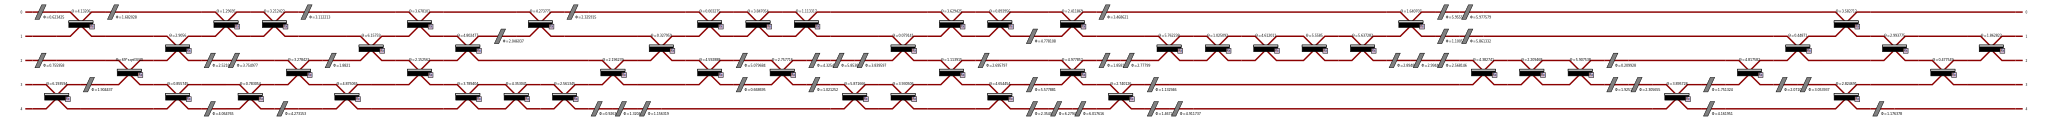

In [27]:
pcvl.pdisplay(test_gate)

In [28]:
ini_state = ini_state
backend = pcvl.BackendFactory().get_backend("Naive")
backend.set_circuit(test_gate)
input_state=pcvl.BasicState(ini_state)
backend.set_input_state(input_state)
re1 = backend.evolve()
re1

StateVector(float,
            {|5,0,0,0,0>: (-0.07104980568793445-0.07240346766838851j),
             |4,1,0,0,0>: (0.12228934437685857-0.04796255139643615j),
             |4,0,1,0,0>: (0.0984108817360847-0.011281954749765684j),
             |4,0,0,1,0>: (0.027903485489020163+0.06502162338437215j),
             |4,0,0,0,1>: (-0.07286887518063956+0.028376029143859855j),
             |3,2,0,0,0>: (-0.034436963335125845+0.11990581232095204j),
             |3,1,1,0,0>: (0.09243953836138481+0.018572210281489015j),
             |3,1,0,1,0>: (-0.0035785924672334813+0.034974864228036154j),
             |3,1,0,0,1>: (0.05678431579733313+0.0762599396265097j),
             |3,0,2,0,0>: (-0.049183218900684916-0.058983167864962334j),
             |3,0,1,1,0>: (-0.0011727197756407977-0.06092214184884916j),
             |3,0,1,0,1>: (0.04201296182632371-0.15544257792595165j),
             |3,0,0,2,0>: (0.04157117389160757+0.07366528681195257j),
             |3,0,0,1,1>: (0.03998795646009496-0.034435

for deepquantum

In [29]:
dq_gate.draw()

In [30]:
re2 = dq_gate.evolve()
re2 

{|00212>: tensor(0.2104-0.0852j, grad_fn=<DivBackward0>),
 |10211>: tensor(0.0618-0.1595j, grad_fn=<DivBackward0>),
 |00023>: tensor(0.1226-0.1184j, grad_fn=<DivBackward0>),
 |11021>: tensor(0.0215-0.1628j, grad_fn=<DivBackward0>),
 |02210>: tensor(0.1177-0.1124j, grad_fn=<DivBackward0>),
 |30101>: tensor(0.0420-0.1554j, grad_fn=<DivBackward0>),
 |01310>: tensor(-0.1497+0.0572j, grad_fn=<DivBackward0>),
 |02120>: tensor(-0.0915+0.1299j, grad_fn=<DivBackward0>),
 |20030>: tensor(0.0072-0.1565j, grad_fn=<DivBackward0>),
 |13010>: tensor(0.1166+0.0887j, grad_fn=<DivBackward0>),
 |00032>: tensor(0.0542-0.1344j, grad_fn=<DivBackward0>),
 |20021>: tensor(0.0997+0.0897j, grad_fn=<DivBackward0>),
 |04010>: tensor(0.1139-0.0683j, grad_fn=<DivBackward0>),
 |00203>: tensor(-0.1309-0.0143j, grad_fn=<DivBackward0>),
 |41000>: tensor(0.1223-0.0480j, grad_fn=<DivBackward0>),
 |00302>: tensor(-0.0243+0.1267j, grad_fn=<DivBackward0>),
 |32000>: tensor(-0.0344+0.1199j, grad_fn=<DivBackward0>),
 |11300>:

In [32]:
## calculating the difference for two simu approach
for key in re1.keys():
    key2 = list(key)
    key3 = state.FockState(5, key2)
    print(key3, abs(re2[key3]-re1[key]))

|50000> tensor(5.2684e-08, grad_fn=<AbsBackward0>)
|41000> tensor(4.0978e-08, grad_fn=<AbsBackward0>)
|40100> tensor(1.4157e-07, grad_fn=<AbsBackward0>)
|40010> tensor(4.4742e-08, grad_fn=<AbsBackward0>)
|40001> tensor(1.5496e-07, grad_fn=<AbsBackward0>)
|32000> tensor(1.3328e-07, grad_fn=<AbsBackward0>)
|31100> tensor(2.1100e-07, grad_fn=<AbsBackward0>)
|31010> tensor(1.2873e-07, grad_fn=<AbsBackward0>)
|31001> tensor(1.1201e-07, grad_fn=<AbsBackward0>)
|30200> tensor(3.2046e-08, grad_fn=<AbsBackward0>)
|30110> tensor(1.3466e-07, grad_fn=<AbsBackward0>)
|30101> tensor(1.3998e-07, grad_fn=<AbsBackward0>)
|30020> tensor(1.2037e-07, grad_fn=<AbsBackward0>)
|30011> tensor(1.0357e-07, grad_fn=<AbsBackward0>)
|30002> tensor(1.5086e-07, grad_fn=<AbsBackward0>)
|23000> tensor(6.1665e-08, grad_fn=<AbsBackward0>)
|22100> tensor(1.4681e-07, grad_fn=<AbsBackward0>)
|22010> tensor(2.6656e-07, grad_fn=<AbsBackward0>)
|22001> tensor(6.0643e-08, grad_fn=<AbsBackward0>)
|21200> tensor(1.3432e-08, grad

## test fockstate  and tensor state

In [49]:
ini_state1 = [[1,(2,1)]]
ini_state2 = [2, 1]
test_cir1 = circuit.QumodeCircuit(nmode=2, init_state=ini_state1, name="test", cutoff = 4, use_full_tensor=True) # using tensor state
test_cir2 = circuit.QumodeCircuit(nmode=2, init_state=ini_state2, name="test", cutoff = 4, use_full_tensor=False) #using fock state


test_cir1.ps(np.pi/4, wires=[0])
test_cir1.ps(np.pi/4, wires=[1])
# test_cir1.ps(np.pi/4, wires=[3])
# test_cir1.bs(np.pi/4, wires=[0,1 ])
# test_cir1.bs(np.pi/4, wires=[2,3])
# test_cir1.bs(np.pi/4, wires=[1,2 ])



test_cir2.ps(np.pi/4, wires=[0])
test_cir2.ps(np.pi/4, wires=[1])
# test_cir2.bs(np.pi/4, wires=[0,1 ])
# test_cir2.bs(np.pi/4, wires=[2,3])
# test_cir2.bs(np.pi/4, wires=[1,2 ])

test_cir1.draw()

In [45]:
re1 = test_cir1()
re1 

tensor([[ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j],
        [ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j],
        [ 0.0000+0.0000j, -0.7071+0.7071j,  0.0000+0.0000j,  0.0000+0.0000j],
        [ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j]],
       dtype=torch.complex128, grad_fn=<PermuteBackward0>)

In [46]:
re1[2,1]

tensor(-0.7071+0.7071j, dtype=torch.complex128, grad_fn=<SelectBackward0>)

In [48]:
np.exp(1j*3*np.pi/4)

(-0.7071067811865475+0.7071067811865476j)

In [50]:
test_cir2.draw()

In [51]:
test_cir2()

{|21>: tensor(-0.7071+0.7071j, grad_fn=<DivBackward0>),
 |12>: tensor(0.+0.j, grad_fn=<DivBackward0>),
 |03>: tensor(0.+0.j, grad_fn=<DivBackward0>),
 |30>: tensor(0.+0.j, grad_fn=<DivBackward0>)}

In [13]:
re1 = test_cir1()  ## tensor
re2 = test_cir2()  ##  dic

In [17]:
re1[2,0,0,2]

tensor(-3.3087e-24-0.5000j, dtype=torch.complex128, grad_fn=<SelectBackward0>)

In [18]:
re2 

{|2002>: tensor(-1.4901e-08-0.5000j, grad_fn=<DivBackward0>),
 |2110>: tensor(0.3536+0.j, grad_fn=<DivBackward0>),
 |0112>: tensor(0.3536-6.3220e-08j, grad_fn=<DivBackward0>),
 |0040>: tensor(-4.8667e-08+0.3062j, grad_fn=<DivBackward0>),
 |0400>: tensor(1.9795e-08+0.3062j, grad_fn=<DivBackward0>),
 |2200>: tensor(3.7253e-08+0.2500j, grad_fn=<DivBackward0>),
 |0202>: tensor(2.9802e-08-0.2500j, grad_fn=<DivBackward0>),
 |2020>: tensor(0.-0.2500j, grad_fn=<DivBackward0>),
 |0220>: tensor(-3.7253e-08+0.2500j, grad_fn=<DivBackward0>),
 |0022>: tensor(0.+0.2500j, grad_fn=<DivBackward0>),
 |1012>: tensor(1.6859e-07+2.1073e-08j, grad_fn=<DivBackward0>),
 |1120>: tensor(1.6859e-07+2.1073e-08j, grad_fn=<DivBackward0>),
 |1030>: tensor(9.7334e-08+1.2167e-07j, grad_fn=<DivBackward0>),
 |3010>: tensor(-4.8667e-08-9.7334e-08j, grad_fn=<DivBackward0>),
 |0031>: tensor(9.7334e-08+0.j, grad_fn=<DivBackward0>),
 |2101>: tensor(-4.2147e-08+8.4294e-08j, grad_fn=<DivBackward0>),
 |1021>: tensor(8.4294e-08+

In [19]:
# compare the difference
for i in re2.keys():
    temp = i.state.tolist()
    print(temp, abs(re1[tuple(temp)]- re2[i]))

[2, 0, 0, 2] tensor(6.9483e-08, dtype=torch.float64, grad_fn=<AbsBackward0>)
[2, 1, 1, 0] tensor(4.9468e-08, dtype=torch.float64, grad_fn=<AbsBackward0>)
[0, 1, 1, 2] tensor(1.1926e-07, dtype=torch.float64, grad_fn=<AbsBackward0>)
[0, 0, 4, 0] tensor(9.5881e-08, dtype=torch.float64, grad_fn=<AbsBackward0>)
[0, 4, 0, 0] tensor(5.6100e-08, dtype=torch.float64, grad_fn=<AbsBackward0>)
[2, 2, 0, 0] tensor(7.8296e-09, dtype=torch.float64, grad_fn=<AbsBackward0>)
[0, 2, 0, 2] tensor(1.3148e-08, dtype=torch.float64, grad_fn=<AbsBackward0>)
[2, 0, 2, 0] tensor(3.3491e-08, dtype=torch.float64, grad_fn=<AbsBackward0>)
[0, 2, 2, 0] tensor(5.9677e-08, dtype=torch.float64, grad_fn=<AbsBackward0>)
[0, 0, 2, 2] tensor(1.2282e-07, dtype=torch.float64, grad_fn=<AbsBackward0>)
[1, 0, 1, 2] tensor(1.6990e-07, dtype=torch.float64, grad_fn=<AbsBackward0>)
[1, 1, 2, 0] tensor(1.6990e-07, dtype=torch.float64, grad_fn=<AbsBackward0>)
[1, 0, 3, 0] tensor(1.5581e-07, dtype=torch.float64, grad_fn=<AbsBackward0>)

## test any gate

In [1]:
import circuit
import gate 
import draw
import state
import numpy as np
import torch 
from scipy import special
import sys 

In [11]:
u_2 = np.eye(2)
u_3 = np.eye(3)
u_4 = np.eye(4)

In [15]:
## check circuit containing u_any
ini_state = [1, 1, 1, 1]
test_cir2 = circuit.QumodeCircuit(nmode=4, init_state=ini_state, name="test", cutoff = 5, use_full_tensor=False) #using fock state


test_cir2.any(u_2, wires=[2,3])
test_cir2.ps(np.pi/4, wires=[0])
test_cir2.ps(np.pi/4, wires=[1])
test_cir2.bs(np.pi/4, wires=[0,1 ])
test_cir2.bs(np.pi/4, wires=[2,3])
test_cir2.bs(np.pi/4, wires=[1,2 ])
test_cir2.any(u_2, wires=[2,3])
test_cir2.ps(np.pi/4, wires=[0])
test_cir2.ps(np.pi/4, wires=[1])
test_cir2.any(u_2, wires=[1,2])
test_cir2.bs(np.pi/4, wires=[1,2])
test_cir2.any(u_4, wires=[0,1,2,3])
test_cir2.ps(np.pi/4, wires=[0])
test_cir2.ps(np.pi/4, wires=[1])
test_cir2.ps(np.pi/4, wires=[2])
test_cir2.ps(np.pi/4, wires=[3])
test_cir2.any(u_2, wires=[0,1])
test_cir2.any(u_3, wires=[1,2,3])

test_cir2.draw()

In [4]:
## check evolving u_any
U1 = np.load("6mode_cnot_1110_00.npy")
U2 =np.load("6mode_cnot_1110_10.npy")

In [22]:
ini_state1 = [[1,(0, 1, 1, 0, 0, 0)]]
ini_state2 = [0, 1, 1, 0, 0, 0]
test_cir1 = circuit.QumodeCircuit(nmode=6, init_state=ini_state1, name="test1", cutoff = 3, use_full_tensor=True) # using tensor state
test_cir2 = circuit.QumodeCircuit(nmode=6, init_state=ini_state2, name="test2", cutoff = 3, use_full_tensor=False) #using fock state

test_cir1.ps(np.pi/4, wires=[0])
test_cir1.ps(np.pi/4, wires=[1])
test_cir1.any(U2, wires=list(range(6)))

test_cir2.ps(np.pi/4, wires=[0])
test_cir2.ps(np.pi/4, wires=[1])
test_cir2.any(U2, wires=list(range(6)))

test_cir1.draw()

In [23]:
test_cir2.draw()

In [24]:
re1 = test_cir1()

In [25]:
re2 = test_cir2()

In [26]:
for i in re2.keys():
    temp = i.state.tolist()
    print(temp, abs(re1[tuple(temp)]- re2[i]), re2[i])

[0, 2, 0, 0, 0, 0] tensor(8.7237e-08, dtype=torch.float64, grad_fn=<AbsBackward0>) tensor(0.3333+0.3333j, grad_fn=<DivBackward0>)
[0, 0, 2, 0, 0, 0] tensor(3.1084e-09, dtype=torch.float64, grad_fn=<AbsBackward0>) tensor(-0.3333-0.3333j, grad_fn=<DivBackward0>)
[0, 0, 1, 1, 0, 0] tensor(1.7387e-09, dtype=torch.float64, grad_fn=<AbsBackward0>) tensor(-0.2357-0.2357j, grad_fn=<DivBackward0>)
[0, 1, 0, 1, 0, 0] tensor(3.4234e-08, dtype=torch.float64, grad_fn=<AbsBackward0>) tensor(0.2357+0.2357j, grad_fn=<DivBackward0>)
[0, 0, 1, 0, 1, 0] tensor(1.1143e-08, dtype=torch.float64, grad_fn=<AbsBackward0>) tensor(0.2166+0.2166j, grad_fn=<DivBackward0>)
[0, 1, 0, 0, 1, 0] tensor(1.1156e-08, dtype=torch.float64, grad_fn=<AbsBackward0>) tensor(0.2166+0.2166j, grad_fn=<DivBackward0>)
[0, 0, 0, 1, 1, 0] tensor(6.8916e-09, dtype=torch.float64, grad_fn=<AbsBackward0>) tensor(0.2166+0.2166j, grad_fn=<DivBackward0>)
[0, 1, 0, 0, 0, 1] tensor(1.4996e-08, dtype=torch.float64, grad_fn=<AbsBackward0>) tenso